In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from scipy.stats import binned_statistic_2d

from analysis.config import birds, h5_path_dict
from analysis.ExpData import ExpData

In [2]:
f = h5py.File(h5_path_dict['LMN73'][3].as_posix(), 'r')

In [ ]:
exp_data = ExpData(f)

# Arena Coverage

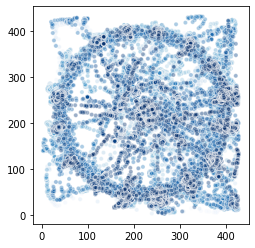

In [6]:
# Trajectory over session
frames = np.arange(exp_data.num_frames)
df_arena = pd.DataFrame({"x":exp_data.x, "y":exp_data.y, "frames":frames})
plt.figure()
ax = plt.gca()
sns.scatterplot(
    x="x", y="y", hue="frames", size=0.1, data=df_arena, alpha=0.4,
    palette=sns.color_palette("Blues", n_colors=exp_data.x.size),
    legend=False, ax=ax)
plt.gca().set_aspect("equal")
#plt.xticks([]); plt.yticks([])
plt.xlabel(""); plt.ylabel("")
plt.show()

# Theta Occupancy

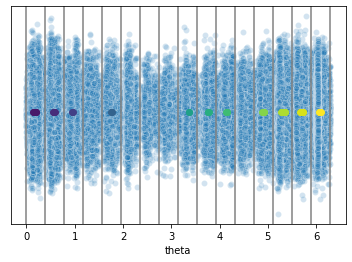

In [109]:
# Scatterplot of thetas
df = pd.DataFrame({
    "theta":exp_data.thetas, "frames":exp_data.num_frames,
    "zeros":np.random.normal(0, 4, exp_data.num_frames)
    })
boundaries = np.linspace(0, 2*pi, 16, endpoint=False)
boundaries = np.append(boundaries, [2*pi])
CacheSites = np.array(f['CacheSites']).squeeze()
CacheFrames = np.array(f['CacheFrames']).squeeze()
cmap = cm.get_cmap('viridis')
plt.figure()
sns.scatterplot(
    x="theta", y="zeros", alpha=0.2, data=df
    )
for boundary in boundaries:
    plt.axvline(boundary, color="gray")
for idx, cache in enumerate(CacheSites):
    frame = np.argwhere(frames == CacheFrames[idx])[0,0]
    rgba = cmap(cache/16.)
    plt.scatter(exp_data.thetas[frame], 0, color=rgba)
plt.yticks([]); plt.ylabel("")
plt.show()

# Neuron Activity during Session

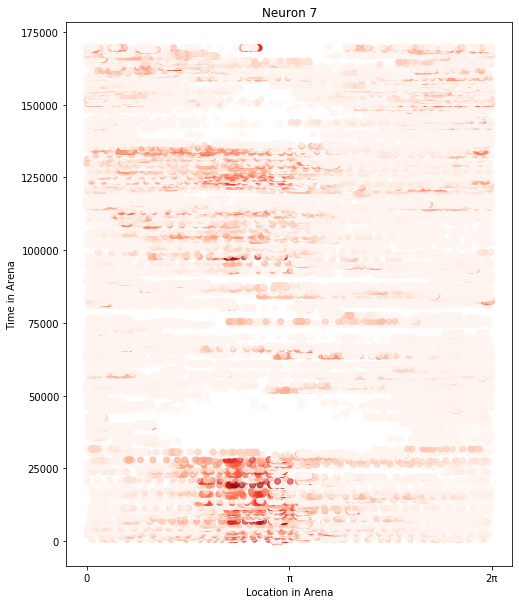

In [13]:
neurs = np.arange(exp_data.num_neurs)#np.random.choice(num_neurons, size=10, replace=False)
for neur in neurs[7:8]:
    spikes = exp_data.spikes[neur,:]
    fr = exp_data.fr[neur,:]
    plt.figure(figsize=(8,10))
    plt.scatter(
        exp_data.thetas, np.arange(exp_data.num_frames),
        c=fr, cmap="Reds", alpha=0.6
        )
#     plt.scatter(
#         exp_data.c[cache_frames], -cache_frames, s=70, marker="*",
#         color="blue", alpha=0.7
#         )
#     plt.scatter(
#         neur_theta[retrievals_frames], -retrievals_frames, s=70, marker="x",
#         color="blue", alpha=0.7
#         )
    plt.ylabel("Time in Arena")
    mins = np.array([20,40,60,80,100,120])
    #plt.yticks(-20*60*mins, mins)
    plt.xlabel("Location in Arena")
    plt.xticks([0, pi, 2*pi], ["0", "\u03C0", "2\u03C0"])
    plt.title("Neuron %d"%neur)
    plt.show()